In [1]:
pwd

'C:\\Users\\abdo\\Anaconda Projects\\Assignment 1&2 take 2'

In [2]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [3]:
def computeCostMulti(X, y, theta):
    
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    

    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    # ==================================================================
    return J


In [4]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================

        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

In [5]:
import pandas as pd
from sklearn import preprocessing

data = pd.read_csv('house_prices_data_training_data.csv')

data.dropna(inplace=True)

#applying random samples shuffling with this line :
#data = data.sample(frac = 1)

data.shape

(17999, 21)

In [6]:
X = data.drop(columns = ['date','id','zipcode','price','sqft_lot','condition','yr_built','yr_renovated','long','sqft_lot15'])
Y = data['price']


#applying different degrees on features 

X['sqft_living2'] = X['sqft_living']**2
X['sqft_above4'] = X['sqft_above']**3
X['sqft_living15_5'] = X['sqft_living15']**4
X['grade3'] = X['grade']**5
X['bathrooms6'] = X['bathrooms']**6



In [7]:
Y = data['price']
X = data.drop(columns = ['price','date','id'])
X = X.to_numpy()
Y = Y.to_numpy()


# Normalization for the features
mu = np.mean(X, axis = 0)
sigma = np.std(X, axis = 0)
X_norm = (X - mu) / sigma


# add coloumns of ones to be a bias
X = np.concatenate([np.ones((Y.size, 1)), X_norm], axis=1)

# 60% training set
X_train = X[0:10800,:]
Y_train =  Y[0:10800]

# 20% cross validation set
X_cross = X[10800:14400,:]
Y_cross = Y[10800:14400]

#20% testing set
X_test = X[14400:17999,:]
Y_test = Y[14400:17999]


theta computed from gradient descent: [532874.47774097 -40059.72872569  30582.92310628  92495.97041673
  -2114.20815316  -4791.80264705  60047.79625344  41041.38065981
  15688.8832043  109518.47586743  88651.5351083   26917.3716162
 -84165.01854989   7531.80262209 -31687.98248643  81309.81910177
 -24795.84983525]


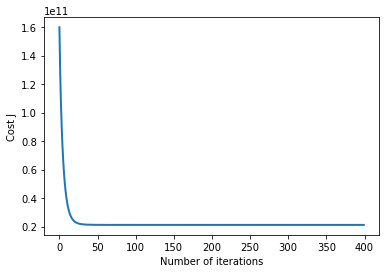

In [8]:
# Choose some alpha value - change this
alpha = 0.1
num_iters = 400

# Training models with different degrees from 1 to 6

# init theta and run gradient descent
theta = np.zeros(X_train[:,0:17].shape[1])


theta, J_history = gradientDescentMulti(X_train[:,0:17], Y_train, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))


In [29]:
print('CV = ',computeCostMulti(X_cross[:,0:17],Y_cross,theta))

CV =  18937208361.916862


In [30]:
print('TEST = ',computeCostMulti(X_test[:,0:17],Y_test,theta))

TEST =  18031392022.849525


In [12]:
Y_test[10:15]

array([765000., 550000., 974350., 653675., 245000.])

In [27]:
#K-fold

# K will be set to 5 
#so we will divide the dataset to 5 sample sets 

S1 = X[0:3600,:]
S2 = X[3600:7200,:]
S3 = X[7200:10800,:]
S4 = X[10800:14400,:]
S5 = X[14400:18000,:]

theta computed from gradient descent: [530267.89302058 -18822.46711488  39177.20956696  56689.66427538
   6095.01586102   6923.75583704  34027.43888696  47486.67453691
  26401.50760826 103536.55403346  53079.35514439  18744.75262757
 -75890.46925776   4881.96584167 -29002.06174351  83716.13122268
 -27406.50090355  41924.56708605  -8390.04399887]


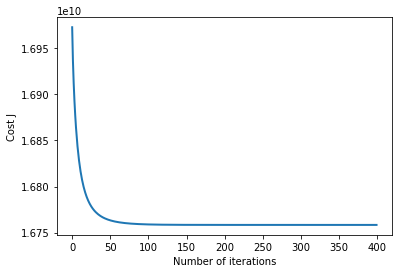

In [14]:
# Choose some alpha value - change this
alpha = 0.1
num_iters = 400

# Training the model with 4 samples of the dataset and testing on 1 sample

# init theta and run gradient descent
theta = np.zeros(S1.shape[1])

theta1,J_history1 = gradientDescentMulti(S2, Y[3600:7200], theta, alpha, num_iters)
theta2,J_history2 = gradientDescentMulti(S3, Y[7200:10800], theta1, alpha, num_iters)
theta3,J_history3 = gradientDescentMulti(S4, Y[10800:14400], theta2, alpha, num_iters)
theta4,J_history4 = gradientDescentMulti(S5, Y[14400:18000], theta3, alpha, num_iters)


# Plot the convergence graph
pyplot.plot(np.arange(len(J_history4)), J_history4, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta4)))


# saving the last values of theta to be used in the next training iteration
theta=theta4

In [15]:
print('the test sample cost = ', computeCostMulti(S1,Y[0:3600],theta4))

the test sample cost =  21184492468.779766


In [16]:
## Regularization

## Creating Regularization functions

def gradientDescentRegularization(X, y, theta, alpha, num_iters,lambda_):
    
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):

        theta = theta - (alpha / m) * (((np.dot(X, theta) - y).dot(X)) + (lambda_*theta))
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

def computeCostRegularization(X, y, theta,lambda_):
    
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0        
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y)) + ((lambda_/2*m)*np.sum(np.square(theta)))
    return J


In [17]:
# training each model of different degrees from 1 to 6 with all the set of lambdas

lambda_ = [0,0.01,0.05,0.1,0.5,1,5,10]

for i in range(len(lambda_)):
    
    theta = np.zeros(X_train[:,0:17].shape[1])

    theta, J_history = gradientDescentRegularization(X_train[:,0:17], Y_train, theta, alpha, num_iters,lambda_[i])
    
    print(computeCostRegularization(X_cross[:,0:17],Y_cross,theta,lambda_[i]))

18937756247.515877
6077063518959.113
30309337291646.06
60599163639835.836
302897141323682.6
605718038452755.8
3026223819932053.0
6046710316890518.0
